# Project: Investigate a Biodiversity in National Parks(EDA)

# Introduction

In this project, I am going to analyze biodiversity data from the National Parks Service, about various species observed in different national park locations.

Here are questions that I plan on exploring over the course of the report:

- Which species were spotted the most at each park?
- Which park has the highest and the lowest number of mammals ?
- Which park has the highest number of endangered species ?
- Which park has maximum endagered Vascular plants ?
- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

## Import libraries and datasets


In [2]:
#here I import all necessary libraries for project

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
observations = pd.read_csv('observations.csv')

observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
species = pd.read_csv('Species_info.csv')

species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


The datasets provided have the following columns of data:

#### species :

species_info.csv:

- **category** - class of animal
- **scientific_name** - the scientific name of each species
- **common_names** - the common names of each species
- **conservation_status** - each species’ current conservation status

#### observations :

- **scientific_name** - the scientific name of each species
- **park_name** - Park where species were found
- **observations** - the number of times each species was observed at park

## Exploratory Data Analysis


In [5]:
print(observations.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
scientific_name    23296 non-null object
park_name          23296 non-null object
observations       23296 non-null int64
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


In [6]:
print(species.info())

species.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
category               5824 non-null object
scientific_name        5824 non-null object
common_names           5824 non-null object
conservation_status    191 non-null object
dtypes: object(4)
memory usage: 182.1+ KB
None


category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

We can see that observations dataset doesn't have null values in any column.But species dataset has 5633 null values in conservation_status column.

In [9]:
print(f"Number of categories is: {species.category.nunique()}")
print(f"Number of distinct species is: {species.scientific_name.nunique()}")


Number of categories is: 7
Number of distinct species is: 5541


By using `value_counts` we can find different categories of species present:

In [7]:
print(species.category.value_counts())

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64


Vascular Plant is the category with most species(4470).After that bird category has the most species in the national parks with 521 species.

In [19]:
print(f"We have {species.conservation_status.nunique()} conservation status:")
print(species.conservation_status.unique())

We have 4 conservation status:
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [22]:
print(f"We have {observations.park_name.nunique()} parks.")
print(f"The names of unique parks are as follows: {observations.park_name.unique()}")

We have 4 parks.
The names of unique parks are as follows: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


### Research Question 1: Which species were spotted the most at each park?

In [73]:
y = observations.groupby(['park_name', 'scientific_name'])['observations'].max().reset_index()\
                                                                          .sort_values(by='observations', ascending=False)

y.groupby('park_name').first()

,scientific_name,observations
park_name,,
Bryce National Park,Valerianella radiata,176
Great Smoky Mountains National Park,Sonchus asper ssp. asper,147
Yellowstone National Park,Lycopodium tristachyum,321
Yosemite National Park,Ivesia shockleyi var. shockleyi,223


By using the above dataframe we can see that:
  - The most spotted species in Bryce National Park is `Valerianella radiata`.
  - The most spotted species in Great Smoky Mountains National Park is `Sonchus asper ssp. asper`.
  - The most spotted species in Yellowstone National Park is `Lycopodium tristachyum`.
  - The most spotted species in Yosemite National Park is `Ivesia shockleyi var. shockleyi`.

### Research Question 2: Which park has the highest and the lowest number of mammals ?

In [74]:
z = observations.merge(species)

mammal_specis = z[z.category == "Mammal"]

mammal_specis.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,28830
1,Great Smoky Mountains National Park,21056
2,Yellowstone National Park,70701
3,Yosemite National Park,42533


Yellowstone National Park has the highest and Great Smoky Mountains National Park has the lowest number of mammals. 

### Research Question 3: Which park has the highest number of endangered species ?

In [79]:
endangered_species = z[z.conservation_status == "Endangered"]

endangered_species.groupby('park_name').scientific_name.nunique().reset_index()

,park_name,scientific_name
0,Bryce National Park,15
1,Great Smoky Mountains National Park,15
2,Yellowstone National Park,15
3,Yosemite National Park,15


In [76]:
endangered_species.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,619
1,Great Smoky Mountains National Park,393
2,Yellowstone National Park,1558
3,Yosemite National Park,943


In terms of number of observations, Yellowstone National Park has the highest number of endangered species(1558).We can see that all four parks have same number of different endangered species type(15)

### Research Question 4: Which park has maximum endagered Vascular plants ?

In [77]:
vascular_plant = z[(z.category == "Vascular Plant") & (z.conservation_status == "Endangered")]

vascular_plant.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,25
1,Great Smoky Mountains National Park,27
2,Yellowstone National Park,63
3,Yosemite National Park,47


Yellowstone National Park has the most number of observed endagered Vascular plants(63).

### Research Question 5: What is the distribution of conservation status for species?

In [4]:
conservationCategoryTable = pd.crosstab(species.conservation_status, species.category)

conservationCategoryTable

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1,4,3,7,0,0,1
In Recovery,0,3,0,1,0,0,0
Species of Concern,4,72,4,28,5,5,43
Threatened,2,0,4,2,0,0,2


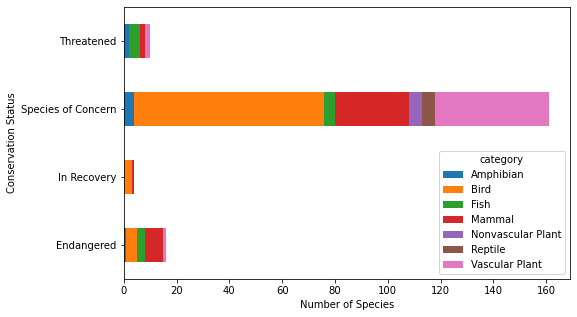

In [26]:
ax= conservationCategoryTable.plot(kind = 'barh', stacked = True, figsize=(8,5))

ax.set_xlabel("Number of Species")
ax.set_ylabel("Conservation Status")

plt.show()

The most of species are not part of conservation(5633).There are 161 species of concern, 16 endangered, 10 threatened, and 4 in recovery.

### Research Question 6: Are certain types of species more likely to be endangered?

As we saw before, there are far more than 200 species in the `species` table. Clearly, only a small number of them are categorized as needing some sort of protection. The rest have `conservation_status` equal to None. Because `groupby` does not include `None`, we will need to fill in the null values. We can do this using `.fillna`. We pass in however we want to fill in our `None` values as an argument.

In [6]:
species.fillna('No Intervention', inplace=True)

Now we can use `groupby` to count the number of unique species of each category.

In [5]:
protection_counts= \
            species.groupby('conservation_status').scientific_name.nunique().reset_index().sort_values(by='scientific_name')

protection_counts

,conservation_status,scientific_name
1,In Recovery,4
4,Threatened,10
0,Endangered,15
3,Species of Concern,151
2,No Intervention,5363


Now let's create a bar chart!

  1. Start by creating a wide figure with `figsize=(10, 4)`
  2. Start by creating an axes object called `ax` using `plt.subplot`.
  3. Create a bar chart whose heights are equal to `scientific_name` column of `protection_counts`.
  4. Create an x-tick for each of the bars.
  5. Label each x-tick with the label from `conservation_status` in `protection_counts`
  6. Label the y-axis `Number of Species`
  7. Title the graph `Conservation Status by Species`
  8. Plot the grap using `plt.show()`

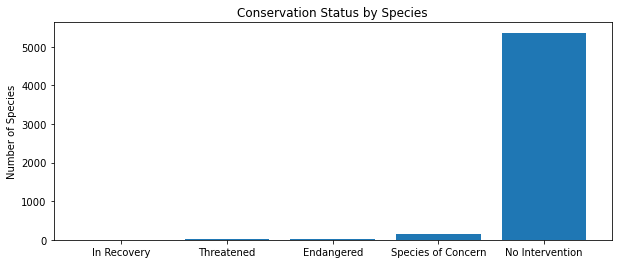

In [13]:
plt.figure(figsize=(10, 4))
ax = plt.subplot()
plt.bar(range(len(protection_counts)),
        protection_counts.scientific_name.values)
ax.set_xticks(range(len(protection_counts)))
ax.set_xticklabels(protection_counts.conservation_status.values)
plt.ylabel('Number of Species')
plt.title('Conservation Status by Species')
plt.show()

Let's create a new column in species called `is_protected`, which is True if `conservation_status` is not equal to `No Intervention`, and `False` otherwise.

In [7]:
species['is_protected'] = species.conservation_status != 'No Intervention'

species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True
8,Mammal,Canis lupus,Gray Wolf,Endangered,True
9,Mammal,Canis rufus,Red Wolf,Endangered,True


Let's group the species data frame by the `category` and `is_protected` columns and count the unique `scientific_names` in each grouping.Then use `pivot` function to rearrange data frame into cross table style that will be ready for chi2 test.Then I use the `.columns` property to rename the categories `True` and `False` to more descriptive names.

Save your results to `category_counts`

In [8]:
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


If we look at absolute number of species protected, we can see that Birds, Vascular Plants, and Mammals have a higher number of species protected.But sometimes proportions and percentages give us more insights.So I create a new column of `category_counts` called `percent_protected` which stores the rate of protection for each category.

In [9]:
category_counts['percent_protected'] = category_counts.protected / \
                                      (category_counts.protected + category_counts.not_protected) * 100

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


By looking at above table, We can see that `Mammals` and `Birds` had the highest percentage of being in protection.

### Research Question 7: Are the differences between species and their conservation status significant?

#### Statistical Significance

Now I run some chi-squared tests to see if different species have statistically significant differences in conservation status rates.We run chi-squared tests to see if there is an accociation between two categorical variables.We need to create a contingency table to run a chi squared test. The contingency table should look like this:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

First we run chi-2 test to see if there is significant difference in conservation status rate of Mammals and Birds.By using data from `category_counts` table we can fill `contingency1` table with the correct values.

In [17]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 146],
              [75, 413]]

chi2, pval, dof, expected = chi2_contingency(contingency1)
print(pval)

0.6875948096661336


Now we can see that p-value of test is 0.69, which is so much larger than standard significant threshold(0.05).This means that this difference is not significant!

Let's test another. Is the difference between `Reptile` and `Mammal` significant?

In [19]:
contingency2 = [[30, 146],
               [5, 73]]

chi2_contingency(contingency2)

chi2, pval, dof, expected = chi2_contingency(contingency2)
print(pval)

0.03835559022969898


This time the p-value(0.038) is smaller than standard significant threshold(0.05).This tells us that there is a significant difference between `Reptile` and `Mammal`.

Let's test another. Is the difference between `Amphibian` and `Vascular Plant` significant?

In [23]:
contingency2 = [[72, 7],
               [4216, 46]]

chi2_contingency(contingency2)

chi2, pval, dof, expected = chi2_contingency(contingency2)
print(pval)

1.0441355146657018e-08


This time the p-value is very low and this means that difference between `Amphibian` and `Vascular Plant` is statistically significant.

By this anlysis we can conclude that there is association between species category and their conservation status.

### Research Question 8: Which animal is most prevalent and what is their distribution amongst parks?

Conservationists have been recording sightings of different species at several national parks for the past 7 days. They've saved sent you their observations in a file called `observations.csv`. 

First we have to look at the the common names from species data frame to find the most prevalent animals in the dataset.If we look at `common_names` column of species, we can see that the data needs cleaning.We have to clean it from punctuation and split it into seperate words.

In [10]:
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species[species.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_Names[:5]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk']]

Now we have to drop duplicates words from each row because they should not be counted more than once per species.For example you can see that in the second row we have two 'Bison' that refers to the same animal.

In [11]:
cleanRows = [list(set(x)) for x in common_Names]

cleanRows[:5]

[['RedBacked', 'Gappers', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Cattle', 'Domestic', 'Feral', 'Domesticated'],
 ['Red', 'Mouflon', 'Domestic', 'Feral', 'Sheep'],
 ['Or', 'Wapiti', 'Elk']]

Now we have to combine all the list and count the frequency of each animal.

In [12]:
combinedList = []

for lst in cleanRows:
    for item in lst:
        combinedList.append(item)
        
combinedList[:12]

['RedBacked',
 'Gappers',
 'Vole',
 'American',
 'Bison',
 'Aurochs',
 'Cattle',
 'Domestic',
 'Feral',
 'Domesticated',
 'Red',
 'Mouflon']

Now I count the number of occurrences of each word in the combined list and store it in the data frame and sort the data frame by descending order of the words count.

In [13]:
details = dict((item, combinedList.count(item)) for item in set(combinedList))

df = pd.DataFrame({'Word' : list(details.keys()), 'Count' : list(details.values())}).sort_values(by='Count', ascending=False)

df.head(15)

,Word,Count
52,Bat,23
96,Shrew,18
179,Myotis,17
138,Mouse,16
198,Chipmunk,13
112,American,12
90,Squirrel,12
70,Eastern,11
61,Vole,11
20,Western,10


We can see that the most prevalent animal in the data set is bat.Since bats have different species with different scientific names,  we have to find out which rows of `species` are referring to bats. I create a new column called `is_bat` which is `True` for bats' species and `False` otherwise.

In [27]:
species['is_bat'] = species.common_names.apply(lambda x: True if 'Bat' in x else False)

species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


Below is a subset of the data where `is_bat` is true:

In [33]:
species[(species.is_bat) & (species.category == "Mammal")]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


Now I merge subset of species data frame which stores bats information with observation data frame to find the observations of bats across the four national parks.

In [35]:
bat_observations = observations.merge(species[(species.is_bat) & (species.category == "Mammal")])

bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


In [37]:
bat_observations.groupby('park_name').observations.sum().reset_index()


,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


As we can see in the table, `Yellowstone National Park` has the largest number of bats observations by 8362 and `Great Smoky Mountains National Park` has the lowest bats with 2411.

Now let's see each park broken down by protected bats vs. non-protected bat sightings.

In [40]:
bat_obs_by_park = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()

bat_obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


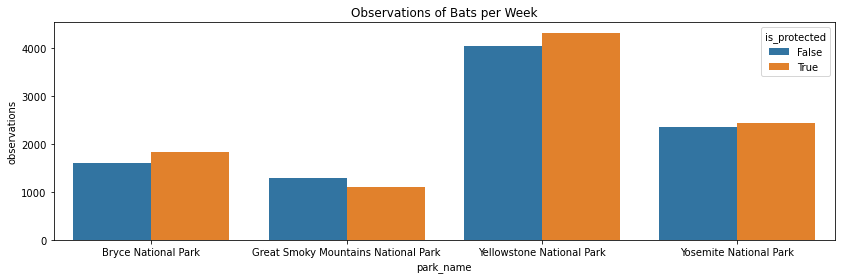

In [46]:
plt.figure(figsize=(14, 4))
sns.barplot(data =bat_obs_by_park , x ='park_name', y='observations', hue ='is_protected')
plt.title('Observations of Bats per Week')
plt.show()

As we can see, the number of protected bats in "Yellowstone National Park", "Bryce National Park" and "Yosemite National Park" are more than non-protected ones.But in "Great Smoky Mountains National Park" there are more non-protected bats than protected bats. 

Some scientists are studying the number of sheep sightings at different national parks. There are several different scientific names for different types of sheep. We'd like to know which rows of `species` are referring to sheep. Notice that the following code will tell us whether or not a word occurs in a string:

In [47]:
# Does "Sheep" occur in this string?
str1 = 'This string contains Sheep'
'Sheep' in str1

True

In [48]:
# Does "Sheep" occur in this string?
str2 = 'This string contains Cows'
'Sheep' in str2

False

Use `apply` and a `lambda` function to create a new column in `species` called `is_sheep` which is `True` if the `common_names` contains 'Sheep', and `False` otherwise.

In [50]:
species['is_sheep'] = species.common_names.apply(lambda x: True if 'Sheep' in x else False)

species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat,is_sheep
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False,True
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False,False


Select the rows of `species` where `is_sheep` is `True` and examine the results.

In [51]:
species[species.is_sheep]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False,True
1139,Vascular Plant,Rumex acetosella,"Sheep Sorrel, Sheep Sorrell",No Intervention,False,False,True
2233,Vascular Plant,Festuca filiformis,Fineleaf Sheep Fescue,No Intervention,False,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,False,True
3758,Vascular Plant,Rumex acetosella,"Common Sheep Sorrel, Field Sorrel, Red Sorrel,...",No Intervention,False,False,True
3761,Vascular Plant,Rumex paucifolius,"Alpine Sheep Sorrel, Fewleaved Dock, Meadow Dock",No Intervention,False,False,True
4091,Vascular Plant,Carex illota,"Sheep Sedge, Smallhead Sedge",No Intervention,False,False,True
4383,Vascular Plant,Potentilla ovina var. ovina,Sheep Cinquefoil,No Intervention,False,False,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,False,True


Many of the results are actually plants. Select the rows of species where `is_sheep` is `True` and `category` is `Mammal`. Save the results to the variable `sheep_species`.

In [54]:
sheep_species = species[(species.is_sheep) & (species.category == 'Mammal')]

sheep_species

,category,scientific_name,common_names,conservation_status,is_protected,is_bat,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,False,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,False,True


Now merge `sheep_species` with `observations` to get a DataFrame with observations of sheep. Save this DataFrame as `sheep_observations`.

In [55]:
sheep_observations = observations.merge(sheep_species)

sheep_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat,is_sheep
0,Ovis canadensis,Yellowstone National Park,219,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,False,True
1,Ovis canadensis,Bryce National Park,109,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,False,True
2,Ovis canadensis,Yosemite National Park,117,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,False,True
3,Ovis canadensis,Great Smoky Mountains National Park,48,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,False,True
4,Ovis canadensis sierrae,Yellowstone National Park,67,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,False,True
5,Ovis canadensis sierrae,Yosemite National Park,39,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,False,True
6,Ovis canadensis sierrae,Bryce National Park,22,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,False,True
7,Ovis canadensis sierrae,Great Smoky Mountains National Park,25,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,False,True
8,Ovis aries,Yosemite National Park,126,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False,True
9,Ovis aries,Great Smoky Mountains National Park,76,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False,True


How many total sheep observations (across all three species) were made at each national park? Use `groupby` to get the sum of `observations` for each `park_name`. Save your answer to `obs_by_park`.

This is the total number of sheep observed in each park over the past 7 days.

In [56]:
obs_by_park = sheep_observations.groupby('park_name').observations.sum().reset_index()

obs_by_park

,park_name,observations
0,Bryce National Park,250
1,Great Smoky Mountains National Park,149
2,Yellowstone National Park,507
3,Yosemite National Park,282


Create a bar chart showing the different number of observations per week at each park.

  1. Start by creating a wide figure with `figsize=(16, 4)`
  2. Start by creating an axes object called `ax` using `plt.subplot`.
  3. Create a bar chart whose heights are equal to `observations` column of `obs_by_park`.
  4. Create an x-tick for each of the bars.
  5. Label each x-tick with the label from `park_name` in `obs_by_park`
  6. Label the y-axis `Number of Observations`
  7. Title the graph `Observations of Sheep per Week`
  8. Plot the grap using `plt.show()`

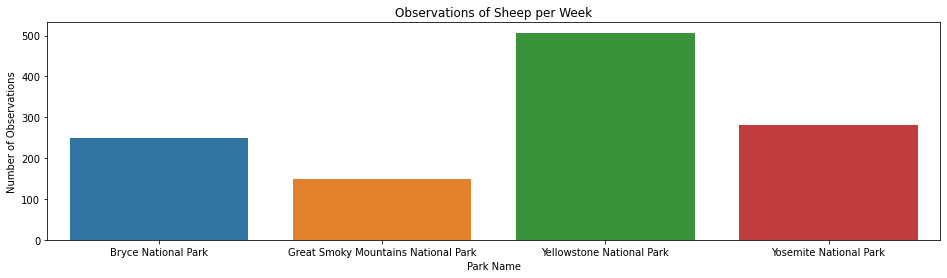

In [65]:
plt.figure(figsize=(16, 4))
ax = plt.subplot()
sns.barplot(data = obs_by_park , x='park_name', y='observations')
plt.xlabel('Park Name')
plt.ylabel('Number of Observations')
plt.title('Observations of Sheep per Week')
plt.show()

Our scientists know that 15% of sheep at Bryce National Park have foot and mouth disease. Park rangers at Yellowstone National Park have been running a program to reduce the rate of foot and mouth disease at that park. The scientists want to test whether or not this program is working. They want to be able to detect reductions of at least 5 percentage point. For instance, if 10% of sheep in Yellowstone have foot and mouth disease, they'd like to be able to know this, with confidence.

Use the [Codecademy sample size calculator](https://s3.amazonaws.com/codecademy-content/courses/learn-hypothesis-testing/a_b_sample_size/index.html). to calculate the number of sheep that they would need to observe from each park. Use the default level of significance (90%).

Remember that "Minimum Detectable Effect" is a percent of the baseline.

In [67]:
minimum_detectable_effect = (15 - 10) / 15 * 100

minimum_detectable_effect

33.33333333333333

In [68]:
baseline_conversion_rate = 15
statistical_significance = 90

By using Codecademy sample size calculator, our sample size is 870.

How many weeks would you need to observe sheep at Bryce National Park in order to observe enough sheep? How many weeks would you need to observe at Yellowstone National Park to observe enough sheep?

In [69]:
#cause in Bryce National Park we observe 250 sheeps per week, in order to reach to 870 we need 870/250 weeks:
Number_of_weeks_Bryce = 870/250

Number_of_weeks_Bryce

3.48

In [71]:
#cause in Yellowstone Park we observe 250 sheeps per week, in order to reach to 870 we need 870/250 weeks:
Number_of_weeks_Yellowstone = 870/507

Number_of_weeks_Yellowstone

1.7159763313609468

We need 3.5 weeks in Bryce National Park and 1.7 weeks in Yellowstone National Park to obtain enough number of samples.

## Conclusions

 - The most spotted species in Bryce National Park is `Valerianella radiata`.
 - The most spotted species in Great Smoky Mountains National Park is `Sonchus asper ssp. asper`.
 - The most spotted species in Yellowstone National Park is `Lycopodium tristachyum`.
 - The most spotted species in Yosemite National Park is `Ivesia shockleyi var. shockleyi`.
 - Yellowstone National Park has the highest and Great Smoky Mountains National Park has the lowest number of mammals.
 - Yellowstone National Park has the highest number of endangered species(1558).We can see that all four parks have same number of different endangered species type(15)
 - Yellowstone National Park has the most number of observed endagered Vascular plants(63).
 - The most of species are not part of conservation(5633).There are 161 species of concern, 16 endangered, 10 threatened, and 4 in recovery.
 - Mammals and Birds had the highest percentage of being in protection.
 - While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.
 - The most prevalent animal in the data set is bat.
 - Yellowstone National Park has the largest number of bats observations by 8362 and Great Smoky Mountains National Park has the lowest bats with 2411.